In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn import metrics
import pandas as pd
from scipy.fftpack import fft

In [24]:
df = pd.read_csv('eeg_schizophrenia.txt', delimiter="\t")
df.head()

,"Timepoint (1min, 128Hz)",1 - F7,2 - F3,3 - F4,4 - F8,5 - T3,6 - C3,7 - Cz,8 - C4,9 - T4,10 - T5,11 - P3,12 - Pz,13 - P4,14 - T6,15 - O1,16 - O2
0,1,-137.02,-530.95,-496.70,-393.93,-239.79,-770.74,-856.38,-839.25,-565.21,-616.59,-839.25,-942.01,-736.48,-530.95,-171.28,-325.42
1,2,-205.53,-565.21,-496.70,-393.93,-256.91,-822.12,-856.38,-839.25,-513.83,-530.95,-736.48,-873.50,-650.85,-462.44,-119.89,-171.28
2,3,-154.15,-445.32,-308.30,-256.91,-51.38,-633.72,-650.85,-633.72,-325.42,-239.79,-342.55,-599.46,-376.81,-205.53,34.26,51.38
3,4,-85.64,-342.55,-154.15,-137.02,17.13,-462.44,-496.70,-462.44,-171.28,-102.77,-119.89,-462.44,-239.79,-85.64,85.64,154.15
4,5,-51.38,-308.30,102.77,85.64,51.38,-239.79,-222.66,-137.02,-17.13,-34.26,17.13,-274.04,-51.38,17.13,0.00,171.28


In [33]:
ts1 = df[['Timepoint (1min, 128Hz)', '1 - F7']].copy()
ts2 = df[['Timepoint (1min, 128Hz)', '16 - O2']].copy()

Text(0, 0.5, 'Vibration (g)')

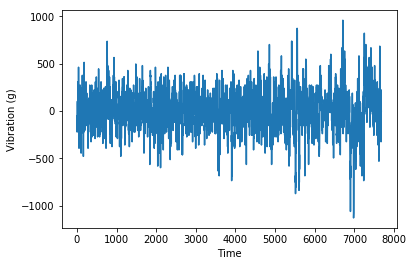

In [44]:
# Data plotting
plt.plot(ts1['Timepoint (1min, 128Hz)'][0:10000], ts1['1 - F7'][0:10000])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')

Text(0, 0.5, 'Vibration (g)')

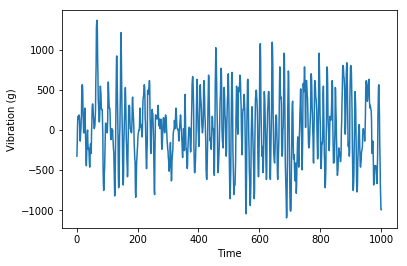

In [45]:
# Data plotting
plt.plot(ts2['Timepoint (1min, 128Hz)'][0:1000], ts2['16 - O2'][0:1000])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')

Text(0, 0.5, 'Vibration (g)')

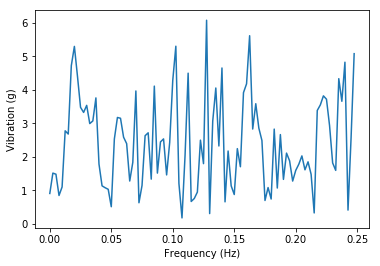

In [46]:
# FFT algorithm for TS1
start_time, end_time = 0, 400
N = (end_time - start_time)*128 
# FFT algorithm
yr = fft(ts1['1 - F7']) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only
# Plotting the results
T = 1/128 # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2)) # x-axis of the plot
plt.plot(x[0:100], y[0:100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')


Text(0, 0.5, 'Vibration (g)')

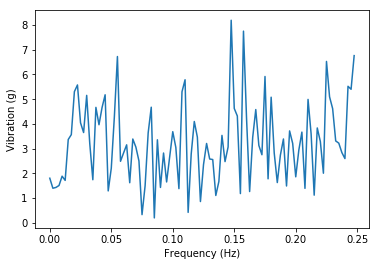

In [47]:
# FFT algorithm for TS2
start_time, end_time = 0, 400
N = (end_time - start_time)*128 
# FFT algorithm
yr = fft(ts2['16 - O2']) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only
# Plotting the results
T = 1/128 # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2)) # x-axis of the plot
plt.plot(x[0:100], y[0:100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
